# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from config import api_key
temp_units = "metric"

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Output/weather_df.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# define url
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={temp_units}&q="

# define count of pass throughs
count_one = 0
set_one = 1

print (query_url+'london')

http://api.openweathermap.org/data/2.5/weather?appid=4a94d4a287a55ba5e7e57c4ea0ae2d8f&units=metric&q=london


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# set lists for the dataframe
city_two = []
cloudinesses = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []


count_one = 0
set_one = 1

for city in cities:
    try:
    #    print(f'processing record {city}')
        city_url = query_url + city
        city_weather = requests.get(city_url).json()
    #    pprint(city_weather)
        # Parse out the max temp, humidity, and cloudiness

        
        city_cloudinesses = city_weather['clouds']['all']
        cloudinesses.append(city_cloudinesses)
        
        city_dates = city_weather['dt']
        dates.append(city_dates)
        
        city_humidities = city_weather['main']['humidity']
        humidities.append(city_humidities)
        
        city_lat = city_weather['coord']['lat']
        lats.append(city_lat)
        
        city_lngs = city_weather['coord']['lon']
        lngs.append(city_lngs)
        
        city_max_temps = city_weather['main']['temp_max']
        max_temps.append(city_max_temps)
        
        city_wind_speeds = city_weather['wind']['speed']
        wind_speeds.append(city_wind_speeds)
        
        city_countries = city_weather['sys']['country']
        countries.append(city_countries)
        
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
            
        print(f"Processing Record {count_one} of Set {set_one} | {city}")

    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")    

City not found. Skipping...
Processing Record 1 of Set 1 | vardo
City not found. Skipping...
Processing Record 2 of Set 1 | fomboni
Processing Record 3 of Set 1 | vaini
City not found. Skipping...
Processing Record 4 of Set 1 | avarua
Processing Record 5 of Set 1 | doha
City not found. Skipping...
Processing Record 6 of Set 1 | poya
Processing Record 7 of Set 1 | yangambi
Processing Record 8 of Set 1 | tadine
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | dongsheng
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | berlevag
Processing Record 13 of Set 1 | luderitz
City not found. Skipping...
Processing Record 14 of Set 1 | kathu
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | hattiesburg
City not found. Skipping...
Processing Record 17 of Set 1 | scottsbluff
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | bath

Processing Record 39 of Set 4 | cabo san lucas
Processing Record 40 of Set 4 | adrar
Processing Record 41 of Set 4 | cherskiy
Processing Record 42 of Set 4 | nkoteng
Processing Record 43 of Set 4 | orlik
Processing Record 44 of Set 4 | holme
Processing Record 45 of Set 4 | srednekolymsk
Processing Record 46 of Set 4 | lasa
Processing Record 47 of Set 4 | labuhan
Processing Record 48 of Set 4 | wenling
City not found. Skipping...
Processing Record 49 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | benghazi
Processing Record 2 of Set 5 | konstantinovka
Processing Record 3 of Set 5 | provideniya
Processing Record 4 of Set 5 | san cristobal
Processing Record 5 of Set 5 | novooleksiyivka
Processing Record 6 of Set 5 | yarim
Processing Record 7 of Set 5 | torbay
Processing Record 8 of Set 5 | benguela
Processing Record 9 of Set 5 | georgetown
Processing Record 10 of Set 5 | caravelas
Processing Record 11 of Set 5 | palmer
Processing Record 12 of Set 5 | hofn
Processing Record 13 of Se

Processing Record 33 of Set 8 | biak
Processing Record 34 of Set 8 | yatou
Processing Record 35 of Set 8 | garissa
Processing Record 36 of Set 8 | talaya
Processing Record 37 of Set 8 | aranos
Processing Record 38 of Set 8 | manaus
Processing Record 39 of Set 8 | bambous virieux
Processing Record 40 of Set 8 | bridlington
Processing Record 41 of Set 8 | lasalgaon
Processing Record 42 of Set 8 | lazarev
Processing Record 43 of Set 8 | rio grande
Processing Record 44 of Set 8 | staryy nadym
Processing Record 45 of Set 8 | mogadishu
Processing Record 46 of Set 8 | dudinka
Processing Record 47 of Set 8 | pasighat
Processing Record 48 of Set 8 | westport
Processing Record 49 of Set 8 | sabla
Processing Record 1 of Set 9 | pouebo
Processing Record 2 of Set 9 | talavera de la reina
Processing Record 3 of Set 9 | nemuro
Processing Record 4 of Set 9 | bandarbeyla
Processing Record 5 of Set 9 | hovd
Processing Record 6 of Set 9 | wanning
Processing Record 7 of Set 9 | ostrovnoy
Processing Record

Processing Record 25 of Set 12 | samarai
Processing Record 26 of Set 12 | stonewall
Processing Record 27 of Set 12 | mauganj
Processing Record 28 of Set 12 | nipawin
Processing Record 29 of Set 12 | kikwit
Processing Record 30 of Set 12 | lahij
Processing Record 31 of Set 12 | puerto ayacucho
Processing Record 32 of Set 12 | goderich
Processing Record 33 of Set 12 | zhangye
Processing Record 34 of Set 12 | talara
Processing Record 35 of Set 12 | constitucion
Processing Record 36 of Set 12 | outjo
Processing Record 37 of Set 12 | canto do buriti
Processing Record 38 of Set 12 | karaton
Processing Record 39 of Set 12 | parkes
Processing Record 40 of Set 12 | kurilsk
City not found. Skipping...
------------------------------
Data Retrieval Complete
------------------------------


In [4]:
len(countries)

579

In [6]:
Df=pd.DataFrame({'city':city_two,
                        
                    'Cloudiness': cloudinesses,
                    'Dates':dates,
                    'Humidity': humidities,
                    'Lat': lats,
                    'Lngs':lngs,
                    'Max Temp':max_temps,
                    'Wind Speed':wind_speeds,
                    'Country':countries})


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [28]:
Df.to_csv("cities.csv")

In [14]:
Df.head()

,city,Cloudiness,Dates,Humidity,Lat,Lngs,Max Temp,Wind Speed,Country
0,vardo,75,1580171757,92,70.37,31.11,-12.00,6.20,NO
1,fomboni,37,1580171760,74,-12.28,43.74,28.19,5.55,KM
2,vaini,75,1580171040,88,-21.20,-175.20,27.00,2.10,TO
3,avarua,100,1580171175,94,-21.21,-159.78,25.00,2.10,CK
4,doha,0,1580171761,66,25.29,51.53,13.00,1.00,QA


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

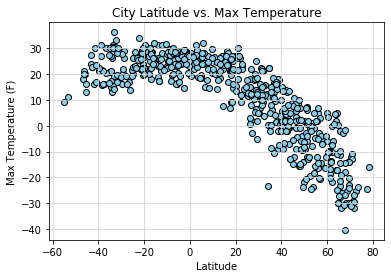

In [15]:
plt.scatter(Df["Lat"],Df["Max Temp"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/fig1.png")
plt.show()

#### Latitude vs. Humidity Plot

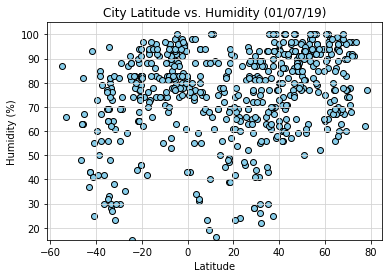

In [16]:
plt.scatter(Df["Lat"],Df["Humidity"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Humidity (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.ylim(15,105)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/fig2.png")
plt.show()

#### Latitude vs. Cloudiness Plot

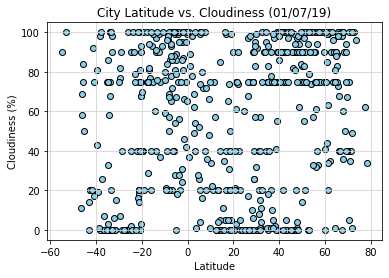

In [17]:
plt.scatter(Df["Lat"],Df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Cloudiness (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/fig3.png")
plt.show()

#### Latitude vs. Wind Speed Plot

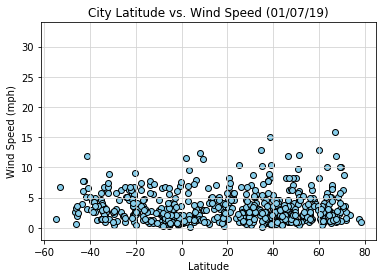

In [18]:
plt.scatter(Df["Lat"],Df["Wind Speed"],edgecolors="black",facecolors="skyblue")
plt.title("City Latitude vs. Wind Speed (01/07/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.ylim(-2,34)
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("Images/fig4.png")
plt.show()

## Linear Regression

In [19]:
# OPTIONAL: Create a function to create Linear Regression plots


In [20]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression